# Analisis World Happines Report dan Model Prediksi Menggunakan Linear Regresion

- **Country name**: Nama Negara
- **Year**: Tahun ketika data dikumpulkan.
- **Life Ladder**: Ukuran kesejahteraan subjektif atau kepuasan hidup pada skala di mana nilai yang lebih tinggi menunjukkan kebahagiaan yang lebih besar.
- **Log GDP per capita**: Logaritma PDB per kapita, mencerminkan kemakmuran ekonomi dan dampaknya terhadap kebahagiaan.
- **Social support**: Metrik yang menunjukkan tingkat dukungan sosial yang dirasakan atau jaringan yang tersedia bagi individu.
- **Healthy life expectancy at birth**: Jumlah tahun seseorang diperkirakan akan hidup sehat sejak lahir.
- **Freedom to make life choices**: Ukuran seberapa bebas individu merasa dalam membuat keputusan hidup.
- **Generosity**: Metrik yang mencerminkan tingkat kedermawanan atau pemberian amal di suatu negara.
- **Perceptions of corruption**: Ukuran seberapa korup pemerintah dipersepsikan, yang memengaruhi kepercayaan dan kepuasan.
- **Positive affect**: Tingkat emosi positif seperti kebahagiaan dan kepuasan yang dialami oleh individu.
- **Negative affect**: Tingkat emosi negatif seperti kesedihan dan kecemasan yang dialami oleh individu.


In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv("World Happiness Report 2024.csv")
pd.set_option('display.max_columns', None)
df.head(20)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326


In [13]:
print("Jumlah Baris : ", df.shape[0])
print("Jumlah Kolom : ", df.shape[1])

Jumlah Baris :  2363
Jumlah Kolom :  11


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [15]:
df.count()

,0
Country name,2363
year,2363
Life Ladder,2363
Log GDP per capita,2335
Social support,2350
Healthy life expectancy at birth,2300
Freedom to make life choices,2327
Generosity,2282
Perceptions of corruption,2238
Positive affect,2339


df.sum()

In [16]:
df.isna().sum()

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,28
Social support,13
Healthy life expectancy at birth,63
Freedom to make life choices,36
Generosity,81
Perceptions of corruption,125
Positive affect,24


In [17]:
df2 = df.dropna().reset_index(drop=True)
df2.isna().sum()

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,0
Social support,0
Healthy life expectancy at birth,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Positive affect,0


In [18]:
df2.head(20)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
5,Afghanistan,2013,3.572100,7.680333,0.483552,52.000000,0.577955,0.059246,0.823204,0.547417,0.273328
6,Afghanistan,2014,3.130896,7.670638,0.525568,52.299999,0.508514,0.102330,0.871242,0.491641,0.374861
7,Afghanistan,2015,3.982855,7.653833,0.528597,52.599998,0.388928,0.078218,0.880638,0.491410,0.339276
8,Afghanistan,2016,4.220169,7.650370,0.559072,52.924999,0.522566,0.040480,0.793246,0.501409,0.348332
9,Afghanistan,2017,2.661718,7.647830,0.490880,53.250000,0.427011,-0.122848,0.954393,0.435270,0.371326


In [19]:
df2.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000,2097.000000
mean,2014.901288,5.466517,9.356037,0.807032,63.271555,0.748863,0.000245,0.747080,0.653719,0.274808
std,4.965942,1.136941,1.154677,0.123677,7.003554,0.138801,0.162192,0.183882,0.107398,0.085464
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.339547,0.035198,0.178886,0.094316
25%,2011.000000,4.611607,8.464981,0.736480,58.660000,0.659140,-0.109458,0.691070,0.571715,0.211092
50%,2015.000000,5.433173,9.496820,0.833816,65.099998,0.769191,-0.021462,0.800700,0.664986,0.263826
75%,2019.000000,6.290690,10.319510,0.905080,68.680000,0.859636,0.092585,0.868372,0.740427,0.326395
max,2023.000000,7.970892,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


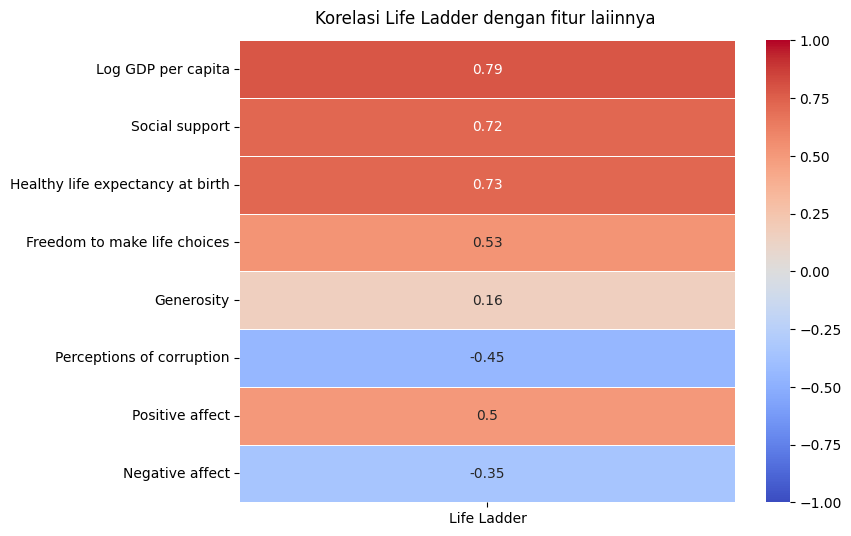

In [29]:
df_filtered = df2.drop(columns=['Country name', 'year'], errors='ignore')

df_numeric = df_filtered.select_dtypes(include=[float, int])

correlation_matrix = df_numeric.corr()


life_ladder_corr = correlation_matrix[['Life Ladder']].drop('Life Ladder')

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(life_ladder_corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Life Ladder dengan fitur laiinnya ', fontsize=12, pad=12)
plt.show()


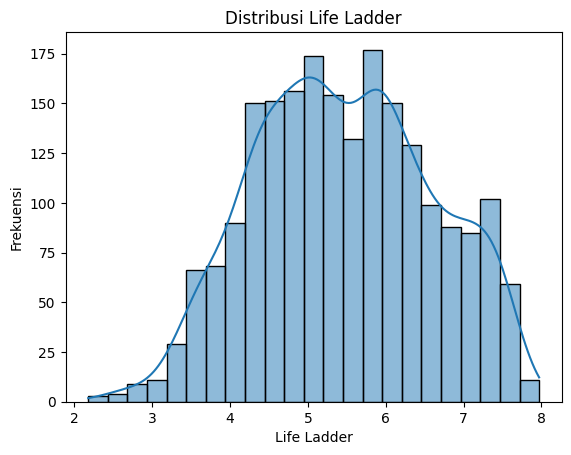

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df2['Life Ladder'], kde=True)
plt.title('Distribusi Life Ladder')
plt.xlabel('Life Ladder')
plt.ylabel('Frekuensi')
plt.show()

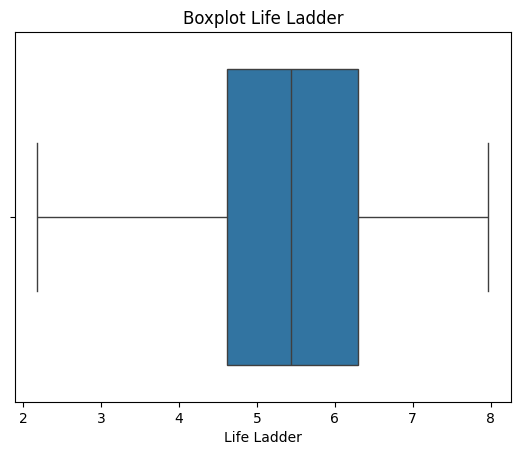

In [21]:
sns.boxplot(x=df2['Life Ladder'])
plt.title('Boxplot Life Ladder')
plt.show()

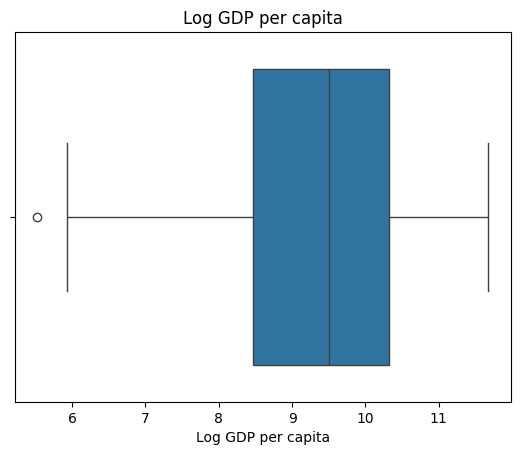

In [22]:
sns.boxplot(x=df2['Log GDP per capita'])
plt.title('Log GDP per capita')
plt.show()

In [23]:
from scipy.stats.mstats import winsorize

In [24]:
df2['Log GDP per capita'] = winsorize(df2['Log GDP per capita'], limits=[0.001, 0]) #0.01 = batas bawah  0 batas atas

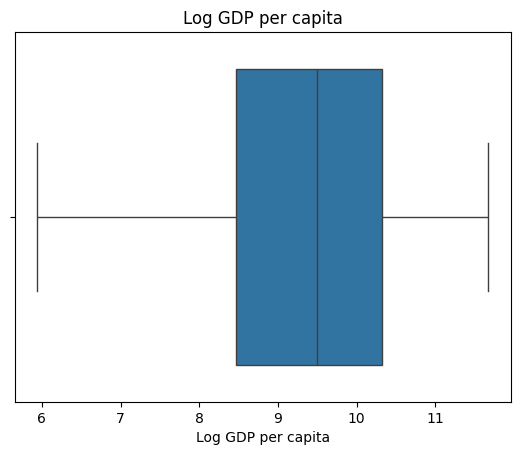

In [25]:
sns.boxplot(x=df2['Log GDP per capita'])
plt.title('Log GDP per capita')
plt.show()

  Country name  Life Ladder
0  Afghanistan     3.505506
1      Albania     5.072808
2      Algeria     5.268920
3       Angola     4.420299
4    Argentina     6.289722


<ipython-input-30-b7870f0d19c8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_happiness_countries, x='Life Ladder', y='Country name', palette='viridis')


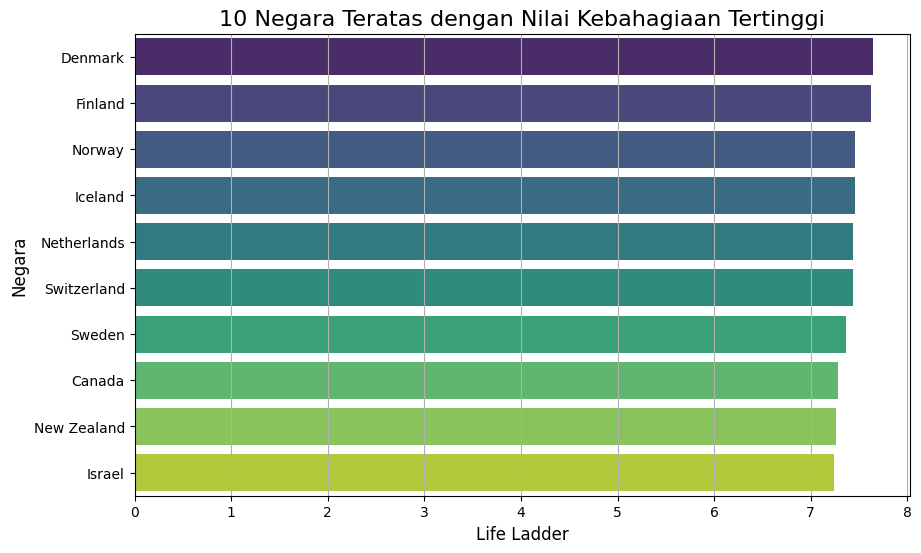

In [30]:
df2 = df2.dropna(subset=['Life Ladder'])
aggregated_data = df2.groupby('Country name', as_index=False)['Life Ladder'].mean()

aggregated_data.reset_index(drop=True, inplace=True)
print(aggregated_data.head())
top_happiness_countries = aggregated_data.sort_values(by='Life Ladder', ascending=False).head(10)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=top_happiness_countries, x='Life Ladder', y='Country name', palette='viridis')
plt.title('10 Negara Teratas dengan Nilai Kebahagiaan Tertinggi', fontsize=16)
plt.xlabel('Life Ladder', fontsize=12)
plt.ylabel('Negara', fontsize=12)
plt.grid(axis='x')
plt.show()

<ipython-input-42-51003c983916>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_happiness_countries, x='Life Ladder', y='Country name', palette='coolwarm')


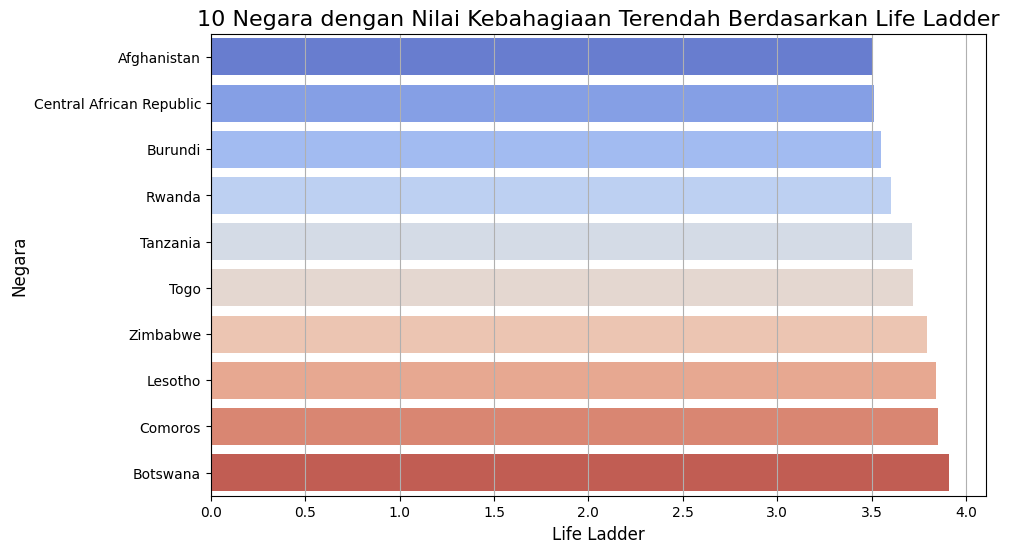

In [42]:
df2 = df2.dropna(subset=['Life Ladder'])

aggregated_data = df2.groupby('Country name', as_index=False)['Life Ladder'].mean()

aggregated_data.reset_index(drop=True, inplace=True)

bottom_happiness_countries = aggregated_data.sort_values(by='Life Ladder', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_happiness_countries, x='Life Ladder', y='Country name', palette='coolwarm')
plt.title('10 Negara dengan Nilai Kebahagiaan Terendah Berdasarkan Life Ladder', fontsize=16)
plt.xlabel('Life Ladder', fontsize=12)
plt.ylabel('Negara', fontsize=12)
plt.grid(axis='x')
plt.show()


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
X = df2[['Log GDP per capita']].values.reshape(-1, 1)  # Fitur
y = df2['Life Ladder']  # Target

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Ukuran set pelatihan (X_train, y_train):", X_train.shape, y_train.shape)
print("Ukuran set pengujian (X_test, y_test):", X_test.shape, y_test.shape)

Ukuran set pelatihan (X_train, y_train): (1677, 1) (1677,)
Ukuran set pengujian (X_test, y_test): (420, 1) (420,)


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [59]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.46869813605934213
R-squared: 0.6019222714171106
Mean Absolute Error (MAE): 0.5503515926059429


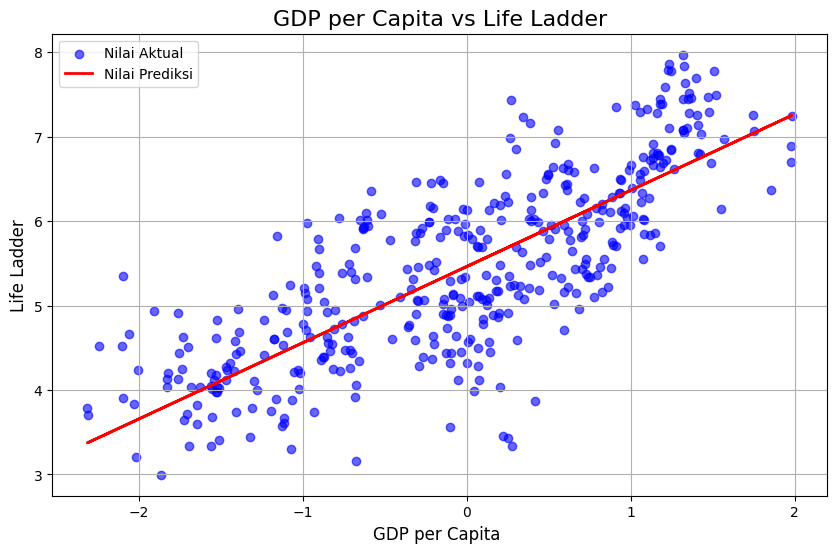

In [53]:
plt.figure(figsize=(10, 6))

plt.scatter(X_test, y_test, color='blue', label='Nilai Aktual', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Nilai Prediksi', linewidth=2)

plt.title('GDP per Capita vs Life Ladder', fontsize=16)
plt.xlabel('GDP per Capita ', fontsize=12)
plt.ylabel('Life Ladder', fontsize=12)

plt.legend()
plt.grid(True)

# plt.xlim() dan plt.ylim()
plt.show()

In [54]:
print("Prediksi: ", y_pred[:5])
print("Nilai sebenarnya", y_test[:5].values)

Prediksi:  [5.4309515  5.54799325 4.5708843  5.70920652 4.91331712]
Nilai sebenarnya [5.31719446 5.69486952 5.14583302 7.43213224 6.01273966]


In [55]:
model.score(X_test, y_test)

0.6019222714171106

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel("Nilai Aktual")
# plt.ylabel("Nilai Prediksi")
# plt.title("Nilai Aktual vs Nilai Prediksi")
# plt.show()

In [ ]:
# residuals = y_test - y_pred

# plt.scatter(y_pred, residuals, alpha=0.5)
# plt.axhline(y=0, color='r', linestyle='--')
# plt.xlabel("Nilai Prediksi (Life Ladder)")
# plt.ylabel("Residuals")
# plt.title("Residual Plot")
# plt.show()

In [39]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

stats = results_df.describe()
print(stats)

           Actual   Predicted
count  420.000000  420.000000
mean     5.459186    5.438938
std      1.086376    0.881312
min      2.997251    3.374369
25%      4.607154    4.754765
50%      5.390360    5.523553
75%      6.204398    6.133530
max      7.970892    7.253130
